In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev datasets==2.14.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 846.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
# from blurr.text.data.all import *
# from blurr.text.modeling.all import *

from blurr.data.all import *
from blurr.modeling.all import *

GroupViT models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version.Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.
TAPAS models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version. Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MasterCourse/Multilabel Effects

Mounted at /content/drive
/content/drive/MyDrive/MasterCourse/Multilabel Effects


In [ ]:
df = pd.read_csv("final_cleaned_experience_reports.csv")
df.head(2)

,title,report_text,effects_terms,token_length,filtered_effects,effect_cat_list
0,Experience:1050 Âµg 1cP-LSD - The matrix,"After 1P-LSD and other LSD derivatives were prohibited in Germany, the answer of the RC branch was 1-Cyclopropionyl-d-lysergic acid diethylamide or short: 1cP-LSD. It was only a minor modification to 1P-LSD according to the manufacturer and is thought to be metabolized to LSD-25 in the body. But even if it is not metabolized, at least the effects are nearly identical in my opinion. In the course of the day, I prepared drinks and sweets, closed the shutters and put seven pellets with 150 μg 1cP-LSD each in my mouth, chewed them and let them get absorbed by the mucous membrane. After just a ...","['brightness alteration', 'cognitive disconnection', 'colour enhancement', 'drifting', 'ego death', 'external hallucination', 'geometry', 'internal hallucinations', 'laughter fits', 'memory suppression', 'morphing', 'time distortion', 'unity and interconnectedness', 'visual disconnection']",628,"['drifting', 'external hallucination', 'geometry', 'memory suppression', 'time distortion', 'unity and interconnectedness']","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]"
1,Experience:26mg - Stage 3 Trip,"Walking to a friends house, I popped a gel capsule pill containing 26mg of 4-AcO-DMT. By the time I had reached his house, I was extremely nauseous. I had to lie down for a good ten minutes, right about when my friend showed up. I started to notice some FOV distortion, a usual effect for me. I was now trying to set up a chrome cast to stream some music/video to, but my short-term memory and motor skills were already lacking. It felt very stoning. Once the TV was set up, we started streaming a new Psyched Substance video to it. This is when visual distortions became much more apparent. The ...","['anxiety', 'geometry', 'nausea', 'time distortion', 'visual acuity enhancement']",461,"['anxiety', 'geometry', 'nausea', 'time distortion']","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]"


In [ ]:
import json

with open("effect_types_encoded.json", "r") as f:
    effect2idx = json.load(f)

print(f"✅ Loaded {len(effect2idx)} effect labels")

✅ Loaded 19 effect labels


In [ ]:
import ast

# Ensure 'filtered_effects' is treated as list
df['filtered_effects'] = df['filtered_effects'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Rebuild effect_cat_list using the loaded effect2idx
def make_multihot(effects):
    vec = [0] * len(effect2idx)
    for e in effects:
        if e in effect2idx:
            vec[effect2idx[e]] = 1
    return vec

df['effect_cat_list'] = df['filtered_effects'].apply(make_multihot)

In [ ]:
from transformers import AutoTokenizer

model_name = "allenai/longformer-base-4096"

hf_config = AutoConfig.from_pretrained(model_name,
                                       problem_type="multi_label_classification",
                                       num_labels=len(effect2idx))
hf_tokenizer = AutoTokenizer.from_pretrained(model_name)
hf_model = AutoModelForSequenceClassification.from_pretrained(model_name, config=hf_config)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/597M [00:00<?, ?B/s]

In [ ]:
from blurr.data.all import HF_TextBlock
from fastai.data.block import DataBlock, MultiCategoryBlock, ColReader
from fastai.data.transforms import RandomSplitter

blocks = (
    HF_TextBlock(model_name, hf_config, hf_tokenizer, hf_model, max_length=4096),
    MultiCategoryBlock(encoded=True, vocab=list(effect2idx.keys()))
)

dblock = DataBlock(
    blocks=blocks,
    get_x=ColReader("report_text"),
    get_y=ColReader("effect_cat_list"),
    splitter=RandomSplitter(0.2, seed=42)
)

dls = dblock.dataloaders(df, bs=2)


In [ ]:
import os

# Optional: create a directory for loaders
os.makedirs("dataloaders", exist_ok=True)

# Save the DataLoaders object
torch.save(dls, "dataloaders/dls-effect-classifier.pkl")

print("✅ Dataloader saved as dataloaders/dls-effect-classifier.pkl")

✅ Dataloader saved as dataloaders/dls-effect-classifier.pkl


In [ ]:
from blurr.modeling.all import HF_BaseModelWrapper
from fastai.losses import BCEWithLogitsLossFlat
from fastai.metrics import accuracy_multi

model = HF_BaseModelWrapper(hf_model)

In [ ]:
acc_thresh = partial(accuracy_multi, thresh=0.2)

In [ ]:
learn = Learner(
    dls,
    model,
    loss_func=BCEWithLogitsLossFlat(),
    metrics=[acc_thresh],
    opt_func=partial(Adam, decouple_wd=True),
    cbs=[HF_BaseModelCallback],
    splitter=hf_splitter
).to_fp16()  # Mixed precision to save memory

In [ ]:
learn.freeze()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.002511886414140463, valley=0.00015848931798245758)

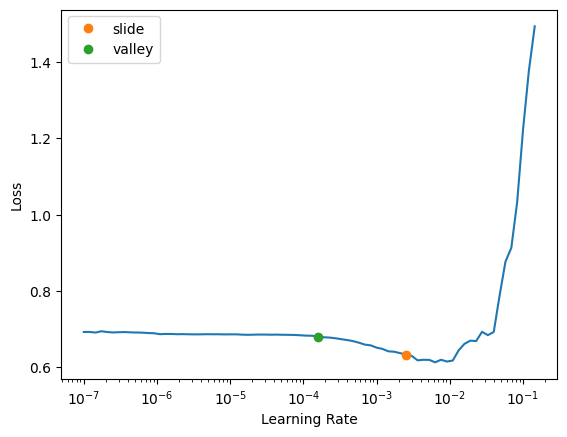

In [ ]:
learn.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learn.fit_one_cycle(2, lr_max=1.58e-4, wd=0.1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.557711,0.504278,0.552632,01:24
1,0.489909,0.506091,0.550125,01:26


In [ ]:
learn.unfreeze()

SuggestedLRs(slide=0.002511886414140463, valley=7.585775892948732e-05)

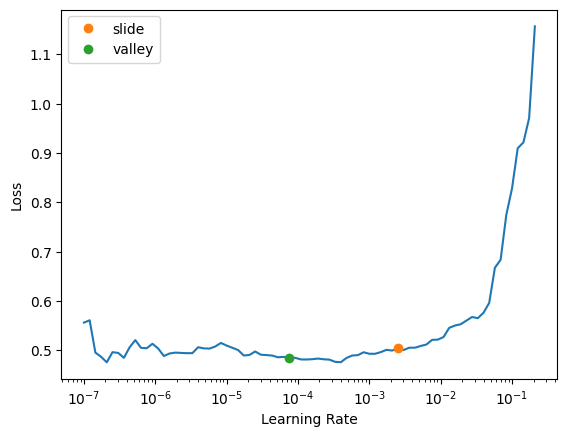

In [ ]:
learn.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learn.fit_one_cycle(3, lr_max=slice(1e-6, 7.6e-5), wd=0.1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.478725,0.507275,0.466165,01:03
1,0.473225,0.500516,0.494987,01:04
2,0.442578,0.499788,0.558897,01:05


In [ ]:
learn.save("effect-classifier-stage-1")

Path('models/effect-classifier-stage-1.pth')

In [ ]:
learn.export("models/effect-classifier-stage-1.pkl")